In [1]:
#Re-importing libraries and data sets
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project'

In [4]:
ha_ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ha_ords_prods_custs.pkl'))

#### creating a mode column for marketting to use for targetted campaigns to each user_id.

In [5]:
#new data frame creating using a method for calculating the mode
fav_dep = ha_ords_prods_custs.groupby('user_id')['department'].apply(pd.Series.mode).to_frame().reset_index()

In [6]:
#Reseting index so that user_id can be used as a merge column onto the main DF
fav_dep

,user_id,level_1,department
0,1,0,snacks
1,2,0,dairy eggs
2,3,0,produce
3,4,0,beverages
4,4,1,frozen
...,...,...,...
168643,206203,0,produce
168644,206206,0,frozen
168645,206207,0,dairy eggs
168646,206208,0,produce


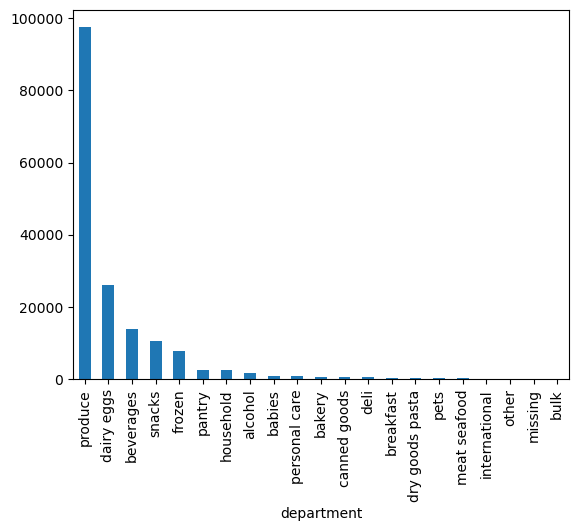

In [7]:
#'level_1' indicates whether a client has more than one mode. e.g user_id 4 buys both beverages and frozen most frequently
# In order to get a general sense of favourite product frequency we can plot the column into a bar chart to see which occur more often
mode_dep_preference = fav_dep['department'].value_counts().plot.bar()

In [8]:
mode_dep_preference.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mode_dep_preference.png'))

##### now that the table has been created - I'll be adding it onto the main DF, so that any marketting/sales user who exports the data can immediately review a clients preference and email them appropriate discounts.
##### Merging on duplicates will cause issues, so we need to remove dupe client ID's which indicates they have 2 modal values. This unaltered subset will be exported - but only the first prefered item will be re-added to the main DF for simplicity.

In [9]:
fav_dep.to_csv(os.path.join(path,'02 Data','Prepared Data','favourite_department_by_user.csv'))

In [10]:
#Check shape before droping dupes
fav_dep.shape

(168648, 3)

In [11]:
fav_dep_clean = fav_dep.drop_duplicates('user_id')

##### based on the row count below the table we removed 4000 duplicate responses and now only have the top result (or first result) per client to merge back into the main DF.

##### First step in merging is to check the column types for both user_ids - they should both be string/object

In [26]:
fav_dep_clean.shape

(162631, 3)

##### just over 6,000 duplicate lines removed from the fav_dep dataframe

In [12]:
fav_dep_clean['user_id'].dtype

dtype('int64')

In [15]:
#unsure when the dataframe converted the variable into a different data type, but we had orginally had the user_id value converted to a string as part of a prior script
fav_dep_clean['user_id'] = fav_dep_clean['user_id'].astype('str')

C:\Users\mojos\AppData\Local\Temp\ipykernel_3960\1563741926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fav_dep_clean['user_id'] = fav_dep_clean['user_id'].astype('str')


In [13]:
ha_ords_prods_custs['user_id'].dtype

dtype('int64')

In [14]:
ha_ords_prods_custs['user_id'] = ha_ords_prods_custs['user_id'].astype('str')

In [16]:
ha_ords_prods_custs = ha_ords_prods_custs.merge(fav_dep_clean, on ='user_id')

In [21]:
ha_ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,date_joined,n_dependants,fam_status,income,_merge,department_x,region,low_activity,level_1,most_freq_department
0,2539329,1,prior,1,2,8,NaN,First Order,196,1,...,2/17/2019,3,married,40423,both,beverages,South,nan,0,snacks
1,2398795,1,prior,2,3,7,15.0,Repeat Customer,196,1,...,2/17/2019,3,married,40423,both,beverages,South,nan,0,snacks
2,473747,1,prior,3,3,12,21.0,Repeat Customer,196,1,...,2/17/2019,3,married,40423,both,beverages,South,nan,0,snacks
3,2254736,1,prior,4,4,7,29.0,Repeat Customer,196,1,...,2/17/2019,3,married,40423,both,beverages,South,nan,0,snacks
4,431534,1,prior,5,4,15,28.0,Repeat Customer,196,1,...,2/17/2019,3,married,40423,both,beverages,South,nan,0,snacks


In [28]:
ha_ords_prods_custs.shape

(30964564, 37)

In [20]:
ha_ords_prods_custs.rename(columns = {'department_y':'most_freq_department'},inplace=True)

In [22]:
ha_ords_prods_custs['most_freq_department'].value_counts(dropna=False)

most_freq_department
produce            20512160
dairy eggs          4800502
beverages           1787360
snacks              1589927
frozen              1049718
babies               236694
pantry               217081
household            214817
alcohol              158402
bakery                66421
canned goods          65680
pets                  62172
personal care         57519
deli                  48818
breakfast             44600
dry goods pasta       33518
meat seafood          14247
international          3762
missing                 506
bulk                    375
other                   285
Name: count, dtype: int64

In [30]:
ha_ords_prods_custs['most_freq_department'].size

30964564

In [25]:
ha_ords_prods_custs.to_pickle(os.path.join(path,'02 Data','Prepared Data','ha_ords_prods_custs_w_dep.pkl'))